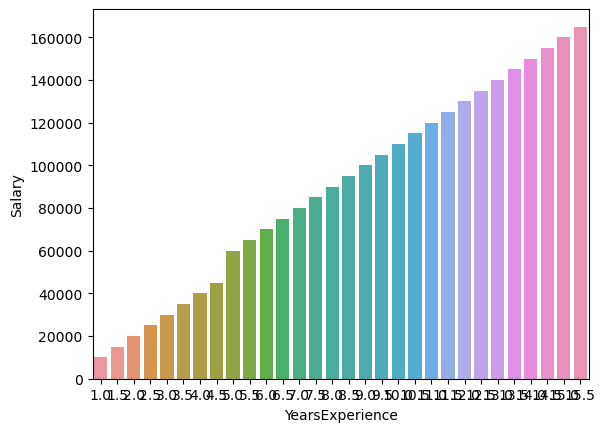

<Figure size 100x200 with 0 Axes>

(21,)
(9,)
(21,)
(9,)
MAE: 3237.2319111899324
MSE: 13406042.84756978
R-squared: 0.9897072088089749
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     6527.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.42e-25
Time:                        12:39:16   Log-Likelihood:                -194.80
No. Observations:                  21   AIC:                             393.6
Df Residuals:                      19   BIC:                             395.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load the dataset using pandas, as it's a local CSV file
salary = pd.read_csv("D:\Salary_Data .csv")

# Create the barplot using seaborn
sns.barplot(x="YearsExperience", y="Salary", data=salary)
plt.figure(figsize=(1, 2)) #adjust the size 
plt.show()
X =salary[ 'YearsExperience' ] #plots yrs of experience in x-axis
y = salary[ 'Salary' ] #plots salary in y-axis

#splitting the dataset to test and train 
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 42 )
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params
X_test_sm = sm.add_constant(X_test)  # Add constant for test set as well
y_pred = lr.predict(X_test_sm)

#check the prediction accuracy of your model:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Example for regression

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)
print(lr.summary())

#give input as user and check your predicted salary
years_experience = float(input("Enter years of experience: "))
user_data = pd.DataFrame({'YearsExperience': [years_experience]})
user_data_sm = sm.add_constant(user_data, has_constant='add')  # Add constant explicitly

predicted_salary = lr.predict(exog=user_data_sm)  # Use 'exog' for prediction
print("Predicted salary:", predicted_salary[0])
